# Homework 3

Student Name: Evan Sayer

Student UT EID: ets756

Partner Name: Tyler Smedley

Partner UT EID: tws933

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**

Be aware that there is not one specific way the graph needs to look. Experiment with different types of graphs, and different parameters for the graph type. Your goal is to present the data as readable as possible. 

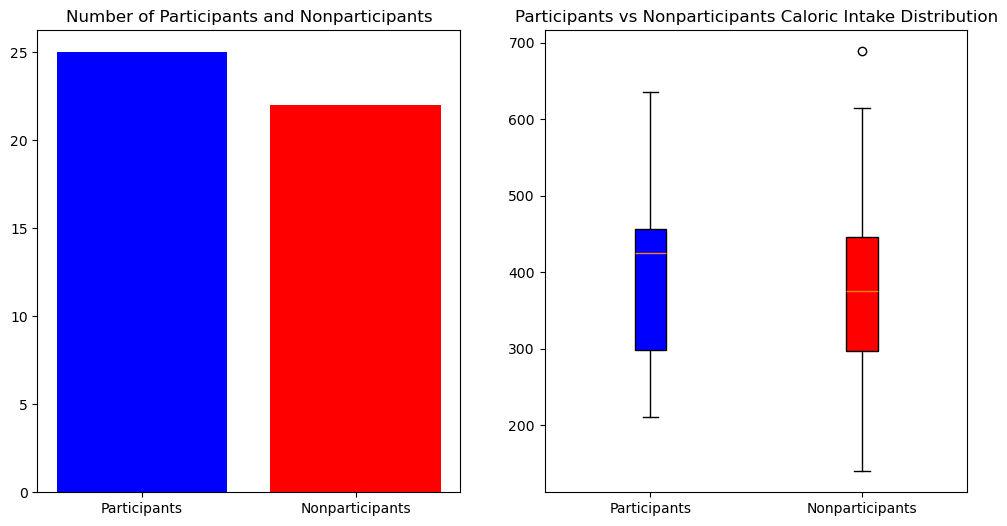

In [2]:
#import and read the files as pandas dataframes
non_participants = pd.read_csv('nonparticipants.csv')
participants = pd.read_csv('participants.csv')

prt_num = participants.size
nprt_num = non_participants.size

plt.rcParams['figure.figsize'] = [12,6]

plt.subplot(1, 2, 1)
plt.bar(['Participants', 'Nonparticipants'], [prt_num, nprt_num], label = ['Participants', 'Nonparticipants'], color = ['blue', 'red'])
plt.title("Number of Participants and Nonparticipants")

plt.subplot(1, 2, 2)
plt.boxplot(participants, patch_artist=True, boxprops=dict(facecolor = 'blue'), positions=[1])
plt.boxplot(non_participants, patch_artist=True, boxprops=dict(facecolor='red'), positions=[2])
plt.xticks([1, 2], ['Participants', 'Nonparticipants'])
plt.title('Participants vs Nonparticipants Caloric Intake Distribution')

plt.show()

# the distribution of calories for participants has a positive skew
# the distribution of calories for nonparticipants is normally skewed

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


In [3]:
# H0: mean = 425
# H1: mean != 425
# a = 0.05
# DF = 24
# use a two-sided, single sample t-test:
result = stats.ttest_1samp(participants, 425)

# calcuate ciritcal t-value based on DF of 24 and an alpha level of 0.05
t = stats.t.ppf(0.95, 24)
# reject null if t >= 1.711. Otherwise, do not reject null
print('Critical T-value:', t)
print('T-statistic:', result[0][0])
print('P-value:', result[1][0])

# because the calculated t-statistic is not greater than the critical t-value, we cannot reject null
# associated p-value is greater than 0.05
# we cannot reject the claim that the mean caloric intake of participants differs from 425



Critical T-value: 1.7108820799094278
T-statistic: -0.6139385690489593
P-value: 0.5450319510318798


# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [4]:
# Add your code or descriptions here 

In [5]:
# DF = 24, alpha = 0.05
t = stats.t.ppf(0.95, 24)
mean = participants.mean()['participants']
print("Mean of Participants:", mean)

# calculate the standard error of the participants
std_error = participants.sem()['participants']
print("Standard Error of Participants:", std_error)

# calculate the interval around the mean
uncert = t * std_error

print('90% Confidince Interval:', mean,  '+/-', uncert)

# The 90% confidence interval for participants is about 410 +/- 41.6.
# This means there is a 90% chance that someone who participated in the meal preperation program
# intook 410 +/- 41.6 calories.

Mean of Participants: 410.07959999999997
Standard Error of Participants: 24.30275723369676
90% Confidince Interval: 410.07959999999997 +/- 41.579151843521004


# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

In [6]:
# H0: mean of participants - mean of nonparticipants = 0
# H1: mean of participants - mean of non participants != 0
# alpha = 0.05
# run a two sided, two sample t-test
tresult = stats.ttest_ind(participants, non_participants)

# use the lowest degree of freedom to be conservative. In this case it is 21
t = stats.t.ppf(0.95, 21)
# calculate critical t value based on a DF of 21 and an alpha value of 0.
# reject null if t >= 1.721. Otherwise, do not reject null
print('Critical T-value:', t)
print('T-statistic:', tresult[0][0])
print('P-value:', tresult[1][0])

# Since the t-statistic is not greater than the ciritcal t-value, we cannot reject the null hyppthesis
# the associated p-value is greater than 0.05
# We cannot reject the hypothesis that the ammount of calories differs between participants and nonparticipants



Critical T-value: 1.7207429028118773
T-statistic: 0.9693504409241457
P-value: 0.337551821942647
